In [239]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [240]:
cars = pd.read_excel("D:\Python_DataScience\Data_Sets\Participants_Data_Used_Cars\Participants_Data_Used_Cars\Data_Train.xlsx")

In [241]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [242]:
cars[(cars['Fuel_Type']=='Electric')]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.58 Lakh,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,NaN,12.75


In [10]:
#cars.drop(cars[cars['Fuel_Type'] == 'Electric'].index, inplace = True) 

In [243]:
cars[['Mil', 'Mil_scl']] = cars.Mileage.str.split(' ',expand = True)
cars[['Eng', 'Eng_scl']] = cars.Engine.str.split(' ',expand = True)
cars[['Pwr', 'Pwr_scl']] = cars.Power.str.split(' ',expand = True)

In [244]:
cars.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
Mil                     2
Mil_scl                 2
Eng                    36
Eng_scl                36
Pwr                    36
Pwr_scl                36
dtype: int64

In [245]:
cars['Pwr'] = cars['Pwr'].apply(lambda x: np.nan if x == "null" else x)

In [246]:
cars['Mil'] = cars.Mil.astype(float)
cars['Eng'] = cars.Eng.astype(float)
cars['Pwr'] = cars.Pwr.astype(float)

In [247]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 19 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
Mil                  6017 non-null float64
Mil_scl              6017 non-null object
Eng                  5983 non-null float64
Eng_scl              5983 non-null object
Pwr                  5876 non-null float64
Pwr_scl              5983 non-null object
dtypes: float64(5), int64(2), object(12)
memory usage: 611.3+ KB


In [248]:
cars.describe()

,Year,Kilometers_Driven,Seats,Price,Mil,Eng,Pwr
count,6019.000000,6.019000e+03,5977.000000,6019.000000,6017.000000,5983.000000,5876.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468,18.134961,1621.276450,113.253050
std,3.269742,9.126884e+04,0.808840,11.187917,4.582289,601.355233,53.874957
min,1998.000000,1.710000e+02,0.000000,0.440000,0.000000,72.000000,34.200000
25%,2011.000000,3.400000e+04,5.000000,3.500000,15.170000,1198.000000,75.000000
50%,2014.000000,5.300000e+04,5.000000,5.640000,18.150000,1493.000000,97.700000
75%,2016.000000,7.300000e+04,5.000000,9.950000,21.100000,1984.000000,138.100000
max,2019.000000,6.500000e+06,10.000000,160.000000,33.540000,5998.000000,560.000000


In [249]:
cars.Kilometers_Driven.min()

171

In [250]:
cars['Brand'] = cars.Name.str.split(' ',expand = True)[0]
cars['Model'] = cars.Name.str.split(' ',expand = True)[1]

In [251]:
cars.Brand.value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Lamborghini         1
Ambassador          1
Smart               1
Isuzu               1
Bentley             1
Name: Brand, dtype: int64

In [252]:
cars['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [253]:
cars["Eng_scl"].nunique()

1

In [254]:
cars["Model"].nunique()

212

In [255]:
cars["Fuel_Type"].nunique()

5

In [256]:
cars.Fuel_Type.value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [257]:
cars.Seats.value_counts()

5.0     5014
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

In [258]:
for col in cars.columns:
    print(col)

Name
Location
Year
Kilometers_Driven
Fuel_Type
Transmission
Owner_Type
Mileage
Engine
Power
Seats
New_Price
Price
Mil
Mil_scl
Eng
Eng_scl
Pwr
Pwr_scl
Brand
Model


In [259]:
ccd = cars[['Brand','Model','Eng','Pwr','Mil','Kilometers_Driven','Seats','Fuel_Type','Transmission','Owner_Type','Location','New_Price','Price']]

In [260]:
ccd.head()

,Brand,Model,Eng,Pwr,Mil,Kilometers_Driven,Seats,Fuel_Type,Transmission,Owner_Type,Location,New_Price,Price
0,Maruti,Wagon,998.0,58.16,26.60,72000,5.0,CNG,Manual,First,Mumbai,NaN,1.75
1,Hyundai,Creta,1582.0,126.20,19.67,41000,5.0,Diesel,Manual,First,Pune,NaN,12.50
2,Honda,Jazz,1199.0,88.70,18.20,46000,5.0,Petrol,Manual,First,Chennai,8.61 Lakh,4.50
3,Maruti,Ertiga,1248.0,88.76,20.77,87000,7.0,Diesel,Manual,First,Chennai,NaN,6.00
4,Audi,A4,1968.0,140.80,15.20,40670,5.0,Diesel,Automatic,Second,Coimbatore,NaN,17.74


In [261]:
ccd.isna().sum()

Brand                   0
Model                   0
Eng                    36
Pwr                   143
Mil                     2
Kilometers_Driven       0
Seats                  42
Fuel_Type               0
Transmission            0
Owner_Type              0
Location                0
New_Price            5195
Price                   0
dtype: int64

In [262]:
ccd['Brand'] = ccd['Brand'].str.capitalize()

c:\users\venkataswamyn\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


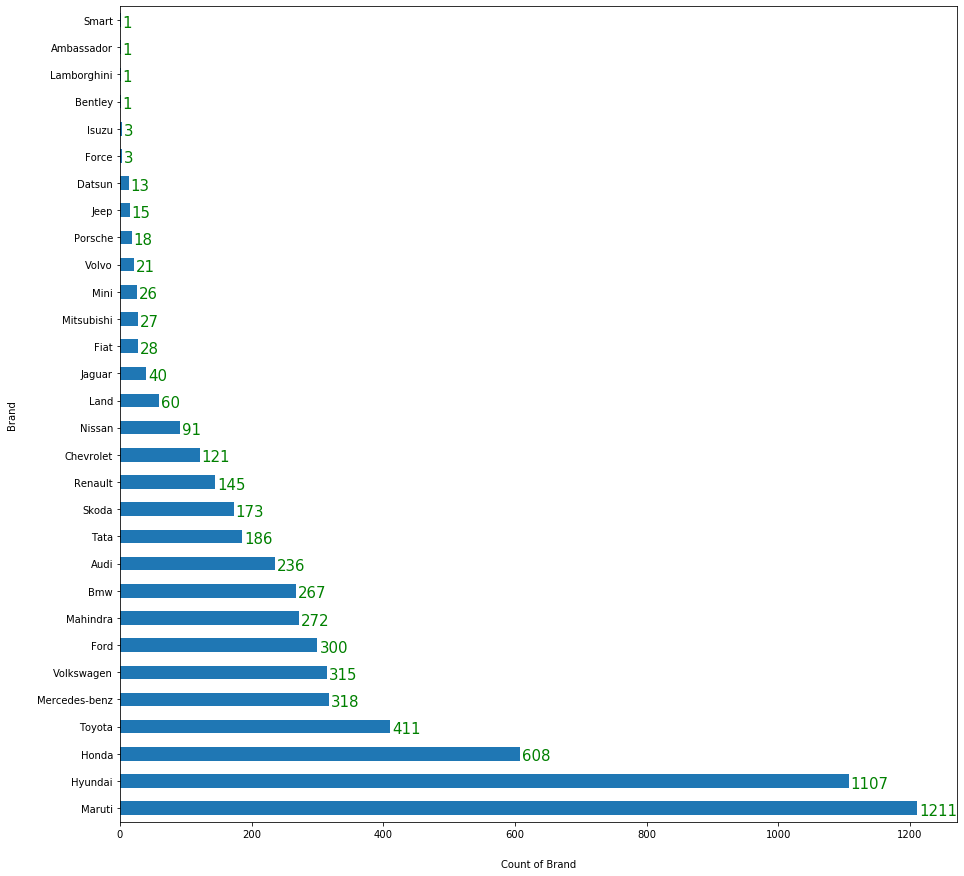

In [263]:
ax = ccd.Brand.value_counts().plot.barh(figsize=(15,15))
plt.ylabel("Brand", labelpad = 20)
plt.xlabel("Count of Brand", labelpad = 20)
for i in ax.patches:
         ax.text(i.get_width()+3, i.get_y(),i.get_width(), color = 'Green', fontsize = 15)
plt.show()

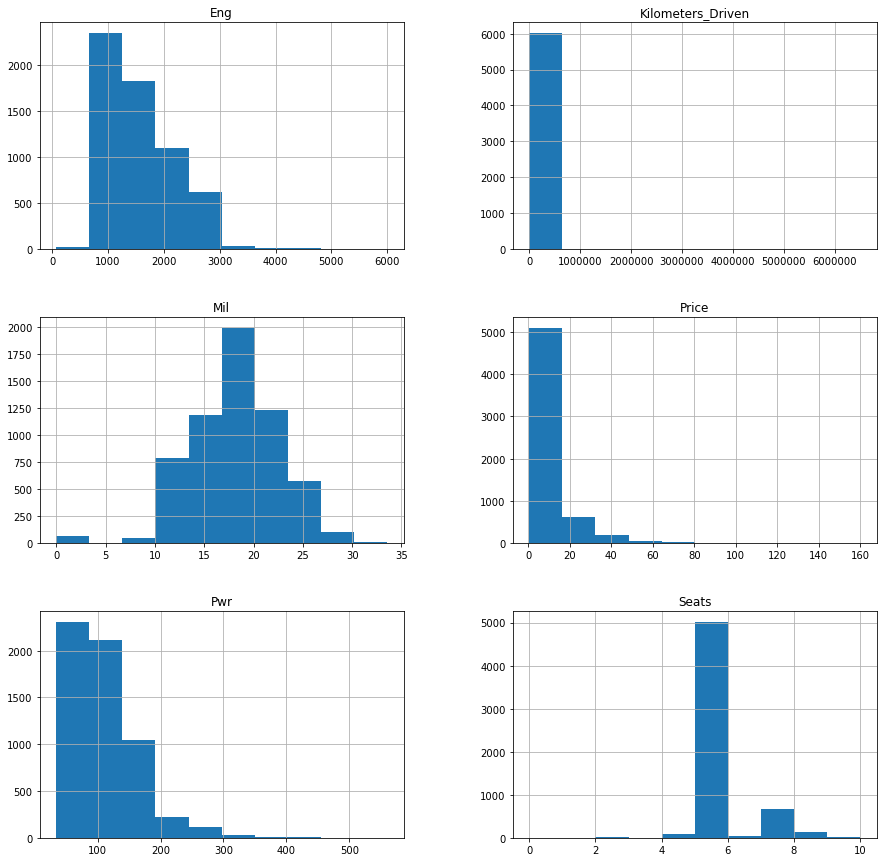

In [264]:
ccd.hist(bins=10, figsize=(15,15))
plt.show()

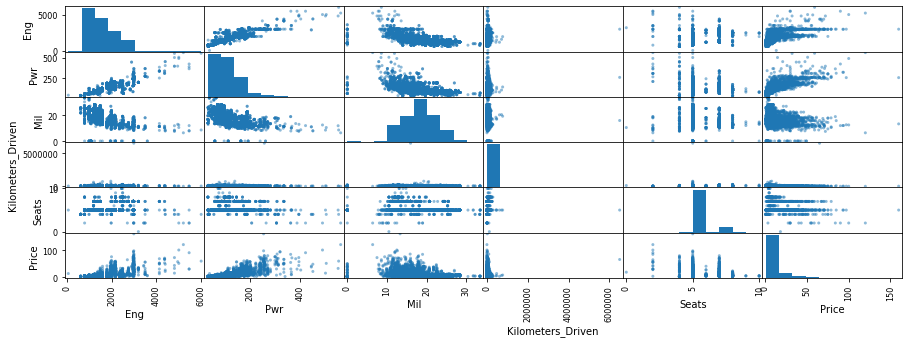

In [265]:
pd.plotting.scatter_matrix(ccd, figsize=(15, 5))
plt.show()

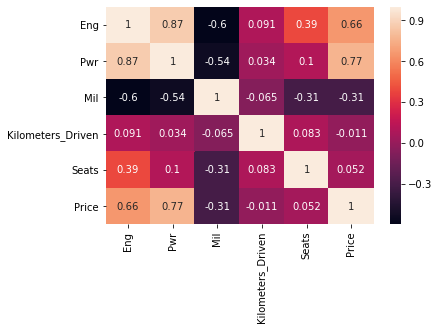

In [266]:
sns.heatmap(ccd.corr(),annot = True)
plt.show()

In [267]:
#x = ccd

In [35]:
#x.isna().sum()

Brand                   0
Model                   0
Eng                    36
Pwr                   143
Mil                     0
Kilometers_Driven       0
Seats                  42
Fuel_Type               0
Transmission            0
Owner_Type              0
Location                0
New_Price            5194
Price                   0
dtype: int64

In [268]:
ccd[ccd.Eng.isnull()]

,Brand,Model,Eng,Pwr,Mil,Kilometers_Driven,Seats,Fuel_Type,Transmission,Owner_Type,Location,New_Price,Price
194,Honda,City,NaN,NaN,0.00,60006,NaN,Petrol,Manual,First,Ahmedabad,NaN,2.95
208,Maruti,Swift,NaN,NaN,16.10,42001,NaN,Petrol,Manual,First,Kolkata,NaN,2.11
733,Maruti,Swift,NaN,NaN,16.10,97800,NaN,Petrol,Manual,Third,Chennai,NaN,1.75
749,Land,Rover,NaN,NaN,0.00,55001,NaN,Diesel,Automatic,Second,Mumbai,NaN,26.50
1294,Honda,City,NaN,NaN,12.80,55005,NaN,Petrol,Manual,First,Delhi,NaN,3.20
1327,Maruti,Swift,NaN,NaN,16.10,50295,NaN,Petrol,Manual,First,Hyderabad,NaN,5.80
1385,Honda,City,NaN,NaN,0.00,115000,NaN,Petrol,Manual,Second,Pune,NaN,1.50
1460,Land,Rover,NaN,NaN,0.00,69078,NaN,Petrol,Manual,First,Coimbatore,NaN,40.88
2074,Maruti,Swift,NaN,NaN,16.10,24255,NaN,Petrol,Manual,First,Pune,NaN,3.15
2096,Hyundai,Santro,NaN,NaN,0.00,52146,NaN,Petrol,Manual,First,Coimbatore,NaN,1.93


In [269]:
j=0
for i in ccd['Eng']:
    if np.isnan(i):
        ccd.loc[j,'Eng'] = ccd[(ccd.Brand == ccd.loc[j,'Brand']) & (ccd.Model == ccd.loc[j,'Model'])]['Eng'].mean()
        j = j+1
    else:
        ccd.loc[j,'Eng'] = i
        j = j+1

c:\users\venkataswamyn\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [270]:
ccd[ccd.Eng.isnull()]

,Brand,Model,Eng,Pwr,Mil,Kilometers_Driven,Seats,Fuel_Type,Transmission,Owner_Type,Location,New_Price,Price


In [271]:
ccd[(ccd['Brand']=='Honda')&(ccd['Model']=="City")] # Index no 194, treated missing Eng Value

,Brand,Model,Eng,Pwr,Mil,Kilometers_Driven,Seats,Fuel_Type,Transmission,Owner_Type,Location,New_Price,Price
11,Honda,City,1497.000000,116.3,16.8,60000,5.0,Petrol,Automatic,First,Kolkata,NaN,4.49
25,Honda,City,1497.000000,116.3,16.8,51920,5.0,Petrol,Manual,First,Mumbai,NaN,4.25
66,Honda,City,1497.000000,78.0,16.4,63000,5.0,Petrol,Automatic,Second,Mumbai,NaN,1.85
85,Honda,City,1497.000000,117.3,17.8,52000,5.0,Petrol,Manual,First,Delhi,NaN,3.25
160,Honda,City,1498.000000,98.6,26.0,42831,5.0,Diesel,Manual,First,Kochi,NaN,7.11
194,Honda,City,1494.718045,NaN,0.0,60006,NaN,Petrol,Manual,First,Ahmedabad,NaN,2.95
237,Honda,City,1497.000000,117.3,17.4,32572,5.0,Petrol,Manual,First,Kolkata,11.74 Lakh,3.87
246,Honda,City,1497.000000,117.3,17.8,33915,5.0,Petrol,Manual,First,Kochi,NaN,8.09
281,Honda,City,1497.000000,118.0,17.0,55000,5.0,Petrol,Manual,First,Jaipur,NaN,4.21
285,Honda,City,1497.000000,118.0,16.8,78442,5.0,Petrol,Automatic,First,Jaipur,NaN,3.57


In [272]:
ccd[(ccd['Brand']=='Maruti')&(ccd['Model']=='Swift')] #Eng CC and Pwr varies across Fuel_Type, Need to consider while treating Missing value

,Brand,Model,Eng,Pwr,Mil,Kilometers_Driven,Seats,Fuel_Type,Transmission,Owner_Type,Location,New_Price,Price
12,Maruti,Swift,1248.000000,74.00,25.20,64424,5.0,Diesel,Manual,First,Jaipur,NaN,5.60
17,Maruti,Swift,1248.000000,74.00,28.40,25000,5.0,Diesel,Manual,First,Jaipur,NaN,5.99
51,Maruti,Swift,1248.000000,74.00,22.90,52000,5.0,Diesel,Manual,First,Delhi,NaN,4.25
52,Maruti,Swift,1248.000000,75.00,17.80,53000,5.0,Diesel,Manual,First,Kolkata,NaN,3.30
53,Maruti,Swift,1248.000000,74.00,28.40,65650,5.0,Diesel,Manual,First,Delhi,NaN,3.85
80,Maruti,Swift,1248.000000,74.00,22.90,95100,5.0,Diesel,Manual,First,Jaipur,NaN,3.75
142,Maruti,Swift,1197.000000,81.80,22.00,34204,5.0,Petrol,Manual,First,Kochi,NaN,5.43
151,Maruti,Swift,1248.000000,74.00,22.90,35000,5.0,Diesel,Manual,First,Chennai,NaN,6.25
162,Maruti,Swift,1197.000000,81.80,20.40,24005,5.0,Petrol,Manual,First,Ahmedabad,NaN,6.20
208,Maruti,Swift,1240.469388,NaN,16.10,42001,NaN,Petrol,Manual,First,Kolkata,NaN,2.11


In [173]:
ccd[(ccd['Brand']=="Land")&(ccd["Model"]=="Rover")] #749 treated Eng missing value.

,Brand,Model,Eng,Pwr,Mil,Kilometers_Driven,Seats,Fuel_Type,Transmission,Owner_Type,Location,New_Price,Price
13,Land,Rover,2179.000000,187.70,12.70,72000,5.0,Diesel,Automatic,First,Delhi,NaN,27.00
14,Land,Rover,2179.000000,115.00,0.00,85000,5.0,Diesel,Automatic,Second,Pune,NaN,17.50
191,Land,Rover,2179.000000,187.70,12.70,36091,5.0,Diesel,Automatic,First,Coimbatore,NaN,55.76
311,Land,Rover,2179.000000,187.70,12.70,44000,5.0,Diesel,Automatic,First,Delhi,NaN,44.00
399,Land,Rover,2179.000000,187.70,12.70,56000,5.0,Diesel,Automatic,First,Hyderabad,NaN,30.00
404,Land,Rover,2179.000000,187.70,12.70,34990,5.0,Diesel,Automatic,First,Coimbatore,NaN,53.83
410,Land,Rover,2179.000000,187.70,12.70,95649,5.0,Diesel,Automatic,First,Coimbatore,NaN,29.67
480,Land,Rover,1999.000000,177.00,15.68,24000,5.0,Diesel,Automatic,Second,Delhi,NaN,33.50
521,Land,Rover,2179.000000,187.70,12.70,49275,5.0,Diesel,Automatic,First,Coimbatore,NaN,45.64
701,Land,Rover,2179.000000,147.51,12.39,109000,5.0,Diesel,Automatic,First,Chennai,NaN,16.50


In [273]:
ccd[(ccd['Brand']=='Hyundai')&(ccd['Model']=='Santro')] # For Most of Santro observations, Eng value is missing treated the same

,Brand,Model,Eng,Pwr,Mil,Kilometers_Driven,Seats,Fuel_Type,Transmission,Owner_Type,Location,New_Price,Price
79,Hyundai,Santro,1086.000000,NaN,0.00,87591,5.0,Petrol,Manual,First,Hyderabad,NaN,1.30
89,Hyundai,Santro,1086.000000,NaN,17.00,73745,5.0,Petrol,Manual,First,Hyderabad,NaN,2.10
120,Hyundai,Santro,1086.000000,NaN,17.00,102000,5.0,Petrol,Manual,Second,Mumbai,NaN,0.85
143,Hyundai,Santro,1086.000000,NaN,17.00,80759,5.0,Petrol,Manual,Third,Kochi,NaN,1.67
245,Hyundai,Santro,1086.000000,NaN,17.00,72000,5.0,Petrol,Manual,Third,Mumbai,NaN,0.95
262,Hyundai,Santro,1086.000000,NaN,0.00,99000,5.0,Petrol,Manual,First,Hyderabad,NaN,1.75
307,Hyundai,Santro,1086.000000,NaN,0.00,58000,5.0,Petrol,Manual,Second,Chennai,NaN,1.50
386,Hyundai,Santro,1086.000000,NaN,17.00,50958,5.0,Petrol,Manual,First,Hyderabad,NaN,1.95
428,Hyundai,Santro,1086.000000,NaN,17.00,108000,5.0,Petrol,Manual,Second,Pune,NaN,1.20
443,Hyundai,Santro,1086.000000,NaN,0.00,50243,5.0,Petrol,Manual,First,Coimbatore,NaN,3.35


In [274]:
ccd[ccd.Pwr.isnull()]

,Brand,Model,Eng,Pwr,Mil,Kilometers_Driven,Seats,Fuel_Type,Transmission,Owner_Type,Location,New_Price,Price
76,Ford,Fiesta,1399.000000,NaN,17.80,111111,5.0,Diesel,Manual,First,Jaipur,NaN,2.00
79,Hyundai,Santro,1086.000000,NaN,0.00,87591,5.0,Petrol,Manual,First,Hyderabad,NaN,1.30
89,Hyundai,Santro,1086.000000,NaN,17.00,73745,5.0,Petrol,Manual,First,Hyderabad,NaN,2.10
120,Hyundai,Santro,1086.000000,NaN,17.00,102000,5.0,Petrol,Manual,Second,Mumbai,NaN,0.85
143,Hyundai,Santro,1086.000000,NaN,17.00,80759,5.0,Petrol,Manual,Third,Kochi,NaN,1.67
194,Honda,City,1494.718045,NaN,0.00,60006,NaN,Petrol,Manual,First,Ahmedabad,NaN,2.95
208,Maruti,Swift,1240.469388,NaN,16.10,42001,NaN,Petrol,Manual,First,Kolkata,NaN,2.11
227,Maruti,Swift,1248.000000,NaN,17.80,47000,5.0,Diesel,Manual,First,Delhi,NaN,4.10
245,Hyundai,Santro,1086.000000,NaN,17.00,72000,5.0,Petrol,Manual,Third,Mumbai,NaN,0.95
262,Hyundai,Santro,1086.000000,NaN,0.00,99000,5.0,Petrol,Manual,First,Hyderabad,NaN,1.75


In [275]:
j=0
for i in ccd['Pwr']:
    if np.isnan(i):
        ccd.loc[j,'Pwr'] = ccd[(ccd.Brand == ccd.loc[j,'Brand']) & (ccd.Model == ccd.loc[j,'Model'])]['Pwr'].mean()
        j = j+1
    else:
        ccd.loc[j,'Pwr'] = i
        j = j+1

In [276]:
ccd[ccd.Pwr.isnull()] # still few missing value exists in Pwr

,Brand,Model,Eng,Pwr,Mil,Kilometers_Driven,Seats,Fuel_Type,Transmission,Owner_Type,Location,New_Price,Price
915,Smart,Fortwo,799.0,NaN,0.0,103000,2.0,Diesel,Automatic,Second,Pune,NaN,3.00
926,Porsche,Cayman,3436.0,NaN,9.0,10000,2.0,Petrol,Manual,First,Hyderabad,NaN,40.00
1319,Fiat,Petra,1242.0,NaN,15.5,120000,5.0,Petrol,Manual,Second,Pune,NaN,0.85
2053,Mahindra,Jeep,2498.0,NaN,0.0,26000,6.0,Diesel,Manual,First,Hyderabad,NaN,6.99
2305,Porsche,Cayman,3436.0,NaN,9.0,8000,2.0,Petrol,Automatic,First,Mumbai,NaN,43.00
2369,Maruti,Estilo,1061.0,NaN,19.5,56000,NaN,Petrol,Manual,Second,Chennai,NaN,1.50
3882,Maruti,Estilo,1061.0,NaN,19.5,40000,NaN,Petrol,Manual,Second,Kolkata,NaN,2.50
4629,Fiat,Siena,1242.0,NaN,0.0,70000,5.0,Petrol,Manual,Third,Jaipur,NaN,0.55
4709,Maruti,1000,970.0,NaN,15.0,104000,5.0,Petrol,Manual,Second,Hyderabad,NaN,0.85
5893,Maruti,Estilo,1061.0,NaN,19.5,51000,NaN,Petrol,Manual,Second,Chennai,NaN,1.75


In [277]:
j=0
for i in ccd['Pwr']:
    if np.isnan(i):
        ccd.loc[j,'Pwr'] = ccd[(ccd.Brand == ccd.loc[j,'Brand'])]['Pwr'].mean()
        j = j+1
    else:
        ccd.loc[j,'Pwr'] = i
        j = j+1

In [278]:
ccd[ccd.Pwr.isnull()]

,Brand,Model,Eng,Pwr,Mil,Kilometers_Driven,Seats,Fuel_Type,Transmission,Owner_Type,Location,New_Price,Price
915,Smart,Fortwo,799.0,NaN,0.0,103000,2.0,Diesel,Automatic,Second,Pune,NaN,3.0


In [279]:
ccd.loc[915,'Pwr'] = 84 # Filled 84bhp for Smart Fortwa

In [280]:
ccd[ccd.Seats.isnull()]

,Brand,Model,Eng,Pwr,Mil,Kilometers_Driven,Seats,Fuel_Type,Transmission,Owner_Type,Location,New_Price,Price
194,Honda,City,1494.718045,110.782707,0.00,60006,NaN,Petrol,Manual,First,Ahmedabad,NaN,2.95
208,Maruti,Swift,1240.469388,77.881682,16.10,42001,NaN,Petrol,Manual,First,Kolkata,NaN,2.11
229,Ford,Figo,1498.000000,99.000000,0.00,70436,NaN,Diesel,Manual,First,Bangalore,NaN,3.60
733,Maruti,Swift,1240.469388,77.881682,16.10,97800,NaN,Petrol,Manual,Third,Chennai,NaN,1.75
749,Land,Rover,2475.719298,189.602105,0.00,55001,NaN,Diesel,Automatic,Second,Mumbai,NaN,26.50
1294,Honda,City,1494.718045,110.782707,12.80,55005,NaN,Petrol,Manual,First,Delhi,NaN,3.20
1327,Maruti,Swift,1240.469388,77.881682,16.10,50295,NaN,Petrol,Manual,First,Hyderabad,NaN,5.80
1385,Honda,City,1494.718045,110.782707,0.00,115000,NaN,Petrol,Manual,Second,Pune,NaN,1.50
1460,Land,Rover,2475.719298,189.602105,0.00,69078,NaN,Petrol,Manual,First,Coimbatore,NaN,40.88
1917,Honda,City,1493.000000,100.000000,13.00,88000,NaN,Petrol,Manual,Second,Jaipur,NaN,1.70


In [183]:
ccd.isna().sum()

Brand                   0
Model                   0
Eng                     0
Pwr                     0
Mil                     2
Kilometers_Driven       0
Seats                  42
Fuel_Type               0
Transmission            0
Owner_Type              0
Location                0
New_Price            5195
Price                   0
dtype: int64

In [281]:
ccd[ccd.Brand.isnull()]

,Brand,Model,Eng,Pwr,Mil,Kilometers_Driven,Seats,Fuel_Type,Transmission,Owner_Type,Location,New_Price,Price


In [282]:
ccd.Seats.fillna(0,inplace = True)

c:\users\venkataswamyn\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [283]:
ccd[ccd['Seats']==0]

,Brand,Model,Eng,Pwr,Mil,Kilometers_Driven,Seats,Fuel_Type,Transmission,Owner_Type,Location,New_Price,Price
194,Honda,City,1494.718045,110.782707,0.00,60006,0.0,Petrol,Manual,First,Ahmedabad,NaN,2.95
208,Maruti,Swift,1240.469388,77.881682,16.10,42001,0.0,Petrol,Manual,First,Kolkata,NaN,2.11
229,Ford,Figo,1498.000000,99.000000,0.00,70436,0.0,Diesel,Manual,First,Bangalore,NaN,3.60
733,Maruti,Swift,1240.469388,77.881682,16.10,97800,0.0,Petrol,Manual,Third,Chennai,NaN,1.75
749,Land,Rover,2475.719298,189.602105,0.00,55001,0.0,Diesel,Automatic,Second,Mumbai,NaN,26.50
1294,Honda,City,1494.718045,110.782707,12.80,55005,0.0,Petrol,Manual,First,Delhi,NaN,3.20
1327,Maruti,Swift,1240.469388,77.881682,16.10,50295,0.0,Petrol,Manual,First,Hyderabad,NaN,5.80
1385,Honda,City,1494.718045,110.782707,0.00,115000,0.0,Petrol,Manual,Second,Pune,NaN,1.50
1460,Land,Rover,2475.719298,189.602105,0.00,69078,0.0,Petrol,Manual,First,Coimbatore,NaN,40.88
1917,Honda,City,1493.000000,100.000000,13.00,88000,0.0,Petrol,Manual,Second,Jaipur,NaN,1.70


In [284]:
j=0
for i in ccd['Seats']:
    if i == 0:
        ccd.loc[j,'Seats'] = round(ccd[(ccd.Brand == ccd.loc[j,'Brand']) & (ccd.Model == ccd.loc[j,'Model'])]['Seats'].mean())
        j = j+1
    else:
        ccd.loc[j,'Seats'] = i
        j = j+1

In [285]:
ccd[ccd['Seats']==0]

,Brand,Model,Eng,Pwr,Mil,Kilometers_Driven,Seats,Fuel_Type,Transmission,Owner_Type,Location,New_Price,Price
2369,Maruti,Estilo,1061.0,74.358511,19.5,56000,0.0,Petrol,Manual,Second,Chennai,NaN,1.50
3882,Maruti,Estilo,1061.0,74.358511,19.5,40000,0.0,Petrol,Manual,Second,Kolkata,NaN,2.50
5893,Maruti,Estilo,1061.0,74.358511,19.5,51000,0.0,Petrol,Manual,Second,Chennai,NaN,1.75


In [295]:
ccd[ccd['Model']=='Estilo']

,Brand,Model,Eng,Pwr,Mil,Kilometers_Driven,Seats,Fuel_Type,Transmission,Owner_Type,Location,New_Price,Price
2369,Maruti,Estilo,1061.0,74.358511,19.5,56000,4.0,Petrol,Manual,Second,Chennai,NaN,1.50
3882,Maruti,Estilo,1061.0,74.358511,19.5,40000,4.0,Petrol,Manual,Second,Kolkata,NaN,2.50
5893,Maruti,Estilo,1061.0,74.358511,19.5,51000,4.0,Petrol,Manual,Second,Chennai,NaN,1.75


In [294]:
ccd.loc[(ccd['Model']=="Estilo", "Seats")] = 4

In [292]:
ccd.head()

,Brand,Model,Eng,Pwr,Mil,Kilometers_Driven,Seats,Fuel_Type,Transmission,Owner_Type,Location,New_Price,Price
0,Maruti,Wagon,998.0,58.16,26.60,72000,5.0,CNG,Manual,First,Mumbai,NaN,1.75
1,Hyundai,Creta,1582.0,126.20,19.67,41000,5.0,Diesel,Manual,First,Pune,NaN,12.50
2,Honda,Jazz,1199.0,88.70,18.20,46000,5.0,Petrol,Manual,First,Chennai,8.61 Lakh,4.50
3,Maruti,Ertiga,1248.0,88.76,20.77,87000,7.0,Diesel,Manual,First,Chennai,NaN,6.00
4,Audi,A4,1968.0,140.80,15.20,40670,5.0,Diesel,Automatic,Second,Coimbatore,NaN,17.74


In [192]:
ccd['Mil']

0       26.60
1       19.67
2       18.20
3       20.77
4       15.20
5       21.10
6       23.08
7       11.36
8       20.54
9       22.30
10      21.56
11      16.80
12      25.20
13      12.70
14       0.00
15      13.50
16      25.80
17      28.40
18      20.45
19      14.84
20      22.69
21      23.65
22      13.53
23      18.50
24      14.40
25      16.80
26      23.08
27      20.92
28      17.50
29      12.80
        ...  
5989    18.25
5990    13.93
5991    22.90
5992    13.70
5993    16.30
5994    17.00
5995    19.87
5996    16.36
5997    26.20
5998    17.24
5999    17.57
6000    18.50
6001    17.68
6002    16.09
6003    23.10
6004    15.30
6005    24.30
6006     8.70
6007    19.30
6008    17.85
6009    19.16
6010    18.50
6011     0.00
6012    12.80
6013    25.80
6014    28.40
6015    24.40
6016    14.00
6017    18.90
6018    25.44
Name: Mil, Length: 6019, dtype: float64

In [293]:
j=0
for i in ccd['Mil']:
    if i == 0:
        ccd.loc[j,'Mil'] = round(ccd[(ccd.Brand == ccd.loc[j,'Brand']) & (ccd.Model == ccd.loc[j,'Model'])]['Mil'].mean())
        j = j+1
    else:
        ccd.loc[j,'Mil'] = i
        j = j+1

In [296]:
ccd[ccd["Mil"]==0]

,Brand,Model,Eng,Pwr,Mil,Kilometers_Driven,Seats,Fuel_Type,Transmission,Owner_Type,Location,New_Price,Price
67,Mercedes-benz,C-Class,1950.0,194.000000,0.0,15369,5.0,Diesel,Automatic,First,Coimbatore,49.14 Lakh,35.67
915,Smart,Fortwo,799.0,84.000000,0.0,103000,2.0,Diesel,Automatic,Second,Pune,NaN,3.00
962,Mercedes-benz,C-Class,1950.0,194.000000,0.0,8682,5.0,Diesel,Automatic,First,Mumbai,52.26 Lakh,39.50
2053,Mahindra,Jeep,2498.0,121.069815,0.0,26000,6.0,Diesel,Manual,First,Hyderabad,NaN,6.99
4629,Fiat,Siena,1242.0,84.830000,0.0,70000,5.0,Petrol,Manual,Third,Jaipur,NaN,0.55
5875,Mercedes-benz,C-Class,1950.0,194.000000,0.0,4000,5.0,Diesel,Automatic,First,Ahmedabad,49.14 Lakh,35.00
5943,Mahindra,Jeep,2112.0,121.069815,0.0,75000,6.0,Diesel,Manual,First,Chennai,NaN,1.70


In [297]:
ccd.loc[(ccd['Model']=="C-Class", "Mil")] = 12.06
ccd.loc[(ccd['Model']=="Jeep", "Mil")] = 13
ccd.loc[(ccd['Model']=="Siena", "Mil")] = 20
ccd.loc[(ccd['Model']=="Fortwo", "Mil")] = 18.5

In [298]:
ccd[(ccd["Model"] == "Jeep")]

,Brand,Model,Eng,Pwr,Mil,Kilometers_Driven,Seats,Fuel_Type,Transmission,Owner_Type,Location,New_Price,Price
2053,Mahindra,Jeep,2498.0,121.069815,13.0,26000,6.0,Diesel,Manual,First,Hyderabad,NaN,6.99
5943,Mahindra,Jeep,2112.0,121.069815,13.0,75000,6.0,Diesel,Manual,First,Chennai,NaN,1.70


In [299]:
ccd = ccd[ccd.Fuel_Type != 'Electric']

In [300]:
ccd.isna().sum() # Need to treat Outliers 

Brand                   0
Model                   0
Eng                     0
Pwr                     0
Mil                     0
Kilometers_Driven       0
Seats                   0
Fuel_Type               0
Transmission            0
Owner_Type              0
Location                0
New_Price            5194
Price                   0
dtype: int64

In [301]:
ccd = ccd.drop(['New_Price'], axis =1)

In [302]:
ccd.isna().sum() # Need to treat Outliers 

Brand                0
Model                0
Eng                  0
Pwr                  0
Mil                  0
Kilometers_Driven    0
Seats                0
Fuel_Type            0
Transmission         0
Owner_Type           0
Location             0
Price                0
dtype: int64

In [307]:
ccd.dtypes

Brand                category
Model                category
Eng                   float64
Pwr                   float64
Mil                   float64
Kilometers_Driven       int64
Seats                 float64
Fuel_Type            category
Transmission         category
Owner_Type           category
Location             category
Price                 float64
dtype: object

In [304]:
ccd["Brand"] = ccd["Brand"].astype('category')
ccd["Model"] = ccd["Model"].astype('category')
ccd["Fuel_Type"] = ccd["Fuel_Type"].astype('category')
ccd["Transmission"] = ccd["Transmission"].astype('category')
ccd["Owner_Type"] = ccd["Owner_Type"].astype('category')
ccd["Location"] = ccd["Location"].astype('category')

In [309]:
ccd["Brand_cat"] = ccd["Brand"].cat.codes
ccd["Model_cat"] = ccd["Model"].cat.codes
ccd["Fuel_Type_cat"] = ccd["Fuel_Type"].cat.codes
ccd["Transmission_cat"] = ccd["Transmission"].cat.codes
ccd["Owner_Type_cat"] = ccd["Owner_Type"].cat.codes
ccd["Location_cat"] = ccd["Location"].cat.codes

In [312]:
ccd1 = ccd.drop(['Brand',"Model","Fuel_Type","Transmission","Owner_Type","Location"], axis =1)

In [313]:
ccd1.head()

,Eng,Pwr,Mil,Kilometers_Driven,Seats,Price,Brand_cat,Model_cat,Fuel_Type_cat,Transmission_cat,Owner_Type_cat,Location_cat
0,998.0,58.16,26.60,72000,5.0,1.75,17,187,0,1,0,9
1,1582.0,126.20,19.67,41000,5.0,12.50,10,53,1,1,0,10
2,1199.0,88.70,18.20,46000,5.0,4.50,9,98,3,1,0,2
3,1248.0,88.76,20.77,87000,7.0,6.00,17,68,1,1,0,2
4,1968.0,140.80,15.20,40670,5.0,17.74,1,10,1,0,2,3


In [315]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [330]:
X = ccd1.drop(["Price"], axis =1)

In [331]:
X.head()

,Eng,Pwr,Mil,Kilometers_Driven,Seats,Brand_cat,Model_cat,Fuel_Type_cat,Transmission_cat,Owner_Type_cat,Location_cat
0,998.0,58.16,26.60,72000,5.0,17,187,0,1,0,9
1,1582.0,126.20,19.67,41000,5.0,10,53,1,1,0,10
2,1199.0,88.70,18.20,46000,5.0,9,98,3,1,0,2
3,1248.0,88.76,20.77,87000,7.0,17,68,1,1,0,2
4,1968.0,140.80,15.20,40670,5.0,1,10,1,0,2,3


In [332]:
y = ccd1.Price

In [333]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [334]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(4813, 11) (4813,)
(1204, 11) (1204,)


In [335]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [336]:
print(lm.intercept_)
print(lm.coef_)

2.6662631387101037
[ 6.38278190e-04  1.33198784e-01  5.56345279e-02 -4.74600556e-05
 -2.36913732e-01  2.27900444e-02  8.61707037e-04 -1.36275571e+00
 -3.18057971e+00 -8.92416282e-01 -2.64568496e-01]


In [338]:
lm.score(X_test,y_test)

-0.02126306734881167

In [15]:
ccd.describe()

,Eng,Pwr,Mil,Kilometers_Driven,Seats,Price
count,5983.000000,5876.000000,6017.000000,6.019000e+03,5977.000000,6019.000000
mean,1621.276450,113.253050,18.134961,5.873838e+04,5.278735,9.479468
std,601.355233,53.874957,4.582289,9.126884e+04,0.808840,11.187917
min,72.000000,34.200000,0.000000,1.710000e+02,0.000000,0.440000
25%,1198.000000,75.000000,15.170000,3.400000e+04,5.000000,3.500000
50%,1493.000000,97.700000,18.150000,5.300000e+04,5.000000,5.640000
75%,1984.000000,138.100000,21.100000,7.300000e+04,5.000000,9.950000
max,5998.000000,560.000000,33.540000,6.500000e+06,10.000000,160.000000


In [16]:
ccd.corr()

,Eng,Pwr,Mil,Kilometers_Driven,Seats,Price
Eng,1.000000,0.866185,-0.597699,0.091068,0.393337,0.658354
Pwr,0.866185,1.000000,-0.537729,0.033503,0.101562,0.772566
Mil,-0.597699,-0.537729,1.000000,-0.065253,-0.308226,-0.306593
Kilometers_Driven,0.091068,0.033503,-0.065253,1.000000,0.083113,-0.011493
Seats,0.393337,0.101562,-0.308226,0.083113,1.000000,0.052225
Price,0.658354,0.772566,-0.306593,-0.011493,0.052225,1.000000


In [ ]:
ccd.isna().sum()

In [21]:
for col in ccd.columns:
    print(col)

Brand
Model
Eng
Pwr
Mil
Kilometers_Driven
Seats
Fuel_Type
Transmission
Owner_Type
Location
New_Price
Price


In [247]:
ccd[(ccd['Eng']==0)] 

,Brand,Model,Eng,Pwr,Mil,Kilometers_Driven,Seats,Fuel_Type,Transmission,Owner_Type,Location,New_Price,Price


In [ ]:
ccd.groupby(['Model']).Eng.mean()

Brand                   0
Model                   0
Eng                    36
Pwr                   143
Mil                     2
Kilometers_Driven       0
Seats                  42
Fuel_Type               0
Transmission            0
Owner_Type              0
Location                0
New_Price            5195
Price                   0
dtype: int64

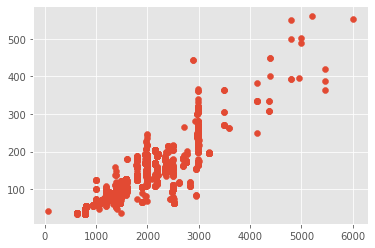

In [14]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

plt.scatter(ccd['Eng'], ccd['Pwr'])
plt.show()

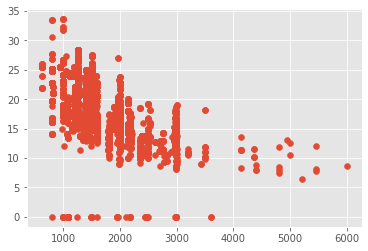

In [81]:
plt.scatter(ccd['Eng'], ccd['Mil'])
plt.show()

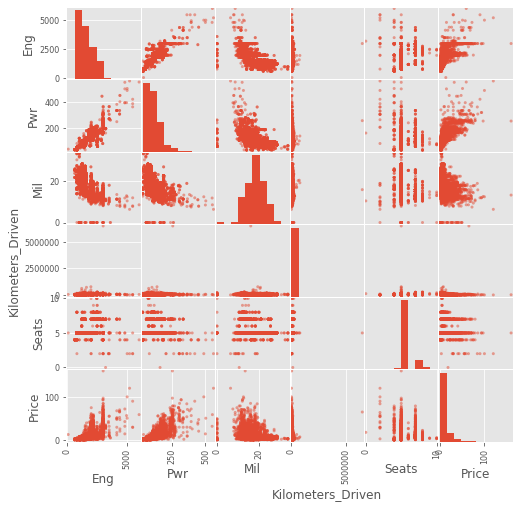

In [90]:
pd.plotting.scatter_matrix(ccd, figsize=(8, 8))
plt.show()

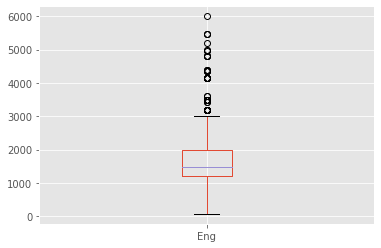

In [96]:
ccd.boxplot('Eng')
plt.show()

,Brand,Model,Eng,Pwr,Mil,Kilometers_Driven,Seats,Fuel_Type,Transmission,Owner_Type,Location,New_Price,Price
915,Smart,Fortwo,799.0,NaN,0.0,103000,2.0,Diesel,Automatic,Second,Pune,NaN,3.00
926,Porsche,Cayman,3436.0,NaN,9.0,10000,2.0,Petrol,Manual,First,Hyderabad,NaN,40.00
1319,Fiat,Petra,1242.0,NaN,15.5,120000,5.0,Petrol,Manual,Second,Pune,NaN,0.85
2053,Mahindra,Jeep,2498.0,NaN,0.0,26000,6.0,Diesel,Manual,First,Hyderabad,NaN,6.99
2305,Porsche,Cayman,3436.0,NaN,9.0,8000,2.0,Petrol,Automatic,First,Mumbai,NaN,43.00
2369,Maruti,Estilo,1061.0,NaN,19.5,56000,NaN,Petrol,Manual,Second,Chennai,NaN,1.50
3882,Maruti,Estilo,1061.0,NaN,19.5,40000,NaN,Petrol,Manual,Second,Kolkata,NaN,2.50
4629,Fiat,Siena,1242.0,NaN,0.0,70000,5.0,Petrol,Manual,Third,Jaipur,NaN,0.55
4709,Maruti,1000,970.0,NaN,15.0,104000,5.0,Petrol,Manual,Second,Hyderabad,NaN,0.85
5893,Maruti,Estilo,1061.0,NaN,19.5,51000,NaN,Petrol,Manual,Second,Chennai,NaN,1.75


In [41]:
x.groupby(["Brand"]).Pwr.mean()

Brand
Ambassador        35.500000
Audi             191.985400
BMW              209.809096
Bentley          552.000000
Chevrolet         90.784786
Datsun            59.716923
Fiat              84.830000
Force            139.030000
Ford              97.013617
Honda            108.676200
Hyundai           90.904007
ISUZU            134.000000
Isuzu            174.570000
Jaguar           239.075250
Jeep             169.333333
Lamborghini      560.000000
Land             189.602105
Mahindra         121.069815
Maruti            74.358511
Mercedes-Benz    193.648108
Mini             147.438462
Mitsubishi       140.134815
Nissan            89.155687
Porsche          331.287500
Renault           87.325172
Skoda            126.713671
Smart                   NaN
Tata              79.403785
Toyota           126.887000
Volkswagen        94.770371
Volvo            187.380952
Name: Pwr, dtype: float64

In [45]:
x[(x['Fuel_Type']=='Electric')]

,Brand,Model,Eng,Pwr,Mil,Kilometers_Driven,Seats,Fuel_Type,Transmission,Owner_Type,Location,New_Price,Price
4446,Mahindra,E,72.0,41.0,NaN,50000,5.0,Electric,Automatic,First,Chennai,13.58 Lakh,13.00
4904,Toyota,Prius,1798.0,73.0,NaN,44000,5.0,Electric,Automatic,First,Mumbai,NaN,12.75


In [302]:

for i in x['Eng']:
    if i == 1496 :
        print(i)

1496.0
1496.0
1496.0
1496.0
1496.0
1496.0
1496.0
1496.0
1496.0
1496.0
1496.0
1496.0
1496.0
1496.0
1496.0
1496.0
1496.0
1496.0
1496.0
1496.0
1496.0
1496.0
1496.0
1496.0
1496.0


In [289]:
x.isna().sum()

Brand                   0
Model                   0
Eng                     0
Pwr                    36
Mil                     2
Kilometers_Driven       0
Seats                  42
Fuel_Type               0
Transmission            0
Owner_Type              0
Location                0
New_Price            5195
Price                   0
dtype: int64

In [ ]:
x.Eng.fillna(0)

In [294]:
x[(x['Eng']==0)]

,Brand,Model,Eng,Pwr,Mil,Kilometers_Driven,Seats,Fuel_Type,Transmission,Owner_Type,Location,New_Price,Price
194,Honda,City,0.0,NaN,0.00,60006,NaN,Petrol,Manual,First,Ahmedabad,NaN,2.95
208,Maruti,Swift,0.0,NaN,16.10,42001,NaN,Petrol,Manual,First,Kolkata,NaN,2.11
733,Maruti,Swift,0.0,NaN,16.10,97800,NaN,Petrol,Manual,Third,Chennai,NaN,1.75
749,Land,Rover,0.0,NaN,0.00,55001,NaN,Diesel,Automatic,Second,Mumbai,NaN,26.50
1294,Honda,City,0.0,NaN,12.80,55005,NaN,Petrol,Manual,First,Delhi,NaN,3.20
1327,Maruti,Swift,0.0,NaN,16.10,50295,NaN,Petrol,Manual,First,Hyderabad,NaN,5.80
1385,Honda,City,0.0,NaN,0.00,115000,NaN,Petrol,Manual,Second,Pune,NaN,1.50
1460,Land,Rover,0.0,NaN,0.00,69078,NaN,Petrol,Manual,First,Coimbatore,NaN,40.88
2074,Maruti,Swift,0.0,NaN,16.10,24255,NaN,Petrol,Manual,First,Pune,NaN,3.15
2096,Hyundai,Santro,0.0,NaN,0.00,52146,NaN,Petrol,Manual,First,Coimbatore,NaN,1.93


In [290]:
x[(x['Brand']=="Honda")&(x['Model']=='City')]

,Brand,Model,Eng,Pwr,Mil,Kilometers_Driven,Seats,Fuel_Type,Transmission,Owner_Type,Location,New_Price,Price
11,Honda,City,1497.0,116.3,16.8,60000,5.0,Petrol,Automatic,First,Kolkata,NaN,4.49
25,Honda,City,1497.0,116.3,16.8,51920,5.0,Petrol,Manual,First,Mumbai,NaN,4.25
66,Honda,City,1497.0,78.0,16.4,63000,5.0,Petrol,Automatic,Second,Mumbai,NaN,1.85
85,Honda,City,1497.0,117.3,17.8,52000,5.0,Petrol,Manual,First,Delhi,NaN,3.25
160,Honda,City,1498.0,98.6,26.0,42831,5.0,Diesel,Manual,First,Kochi,NaN,7.11
194,Honda,City,0.0,NaN,0.0,60006,NaN,Petrol,Manual,First,Ahmedabad,NaN,2.95
237,Honda,City,1497.0,117.3,17.4,32572,5.0,Petrol,Manual,First,Kolkata,11.74 Lakh,3.87
246,Honda,City,1497.0,117.3,17.8,33915,5.0,Petrol,Manual,First,Kochi,NaN,8.09
281,Honda,City,1497.0,118.0,17.0,55000,5.0,Petrol,Manual,First,Jaipur,NaN,4.21
285,Honda,City,1497.0,118.0,16.8,78442,5.0,Petrol,Automatic,First,Jaipur,NaN,3.57


In [283]:
cars[(cars.Eng.isnull())]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,...,New_Price,Price,Mil,Mil_scl,Eng,Eng_scl,Pwr,Pwr_scl,Brand,Model
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,...,NaN,2.95,0.00,kmpl,NaN,NaN,NaN,NaN,Honda,City
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,...,NaN,2.11,16.10,kmpl,NaN,NaN,NaN,NaN,Maruti,Swift
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,...,NaN,1.75,16.10,kmpl,NaN,NaN,NaN,NaN,Maruti,Swift
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,...,NaN,26.50,0.00,kmpl,NaN,NaN,NaN,NaN,Land,Rover
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,...,NaN,3.20,12.80,kmpl,NaN,NaN,NaN,NaN,Honda,City
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.1 kmpl,NaN,NaN,...,NaN,5.80,16.10,kmpl,NaN,NaN,NaN,NaN,Maruti,Swift
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,...,NaN,1.50,0.00,kmpl,NaN,NaN,NaN,NaN,Honda,City
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.0 kmpl,NaN,NaN,...,NaN,40.88,0.00,kmpl,NaN,NaN,NaN,NaN,Land,Rover
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.1 kmpl,NaN,NaN,...,NaN,3.15,16.10,kmpl,NaN,NaN,NaN,NaN,Maruti,Swift
2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.0 kmpl,NaN,NaN,...,NaN,1.93,0.00,kmpl,NaN,NaN,NaN,NaN,Hyundai,Santro


In [285]:
ccd[(ccd['Brand']=="Honda")&(ccd['Model']=='City')]

,Brand,Model,Eng,Pwr,Mil,Kilometers_Driven,Seats,Fuel_Type,Transmission,Owner_Type,Location,New_Price,Price
11,Honda,City,1497.0,116.3,16.8,60000,5.0,Petrol,Automatic,First,Kolkata,NaN,4.49
25,Honda,City,1497.0,116.3,16.8,51920,5.0,Petrol,Manual,First,Mumbai,NaN,4.25
66,Honda,City,1497.0,78.0,16.4,63000,5.0,Petrol,Automatic,Second,Mumbai,NaN,1.85
85,Honda,City,1497.0,117.3,17.8,52000,5.0,Petrol,Manual,First,Delhi,NaN,3.25
160,Honda,City,1498.0,98.6,26.0,42831,5.0,Diesel,Manual,First,Kochi,NaN,7.11
194,Honda,City,0.0,NaN,0.0,60006,NaN,Petrol,Manual,First,Ahmedabad,NaN,2.95
237,Honda,City,1497.0,117.3,17.4,32572,5.0,Petrol,Manual,First,Kolkata,11.74 Lakh,3.87
246,Honda,City,1497.0,117.3,17.8,33915,5.0,Petrol,Manual,First,Kochi,NaN,8.09
281,Honda,City,1497.0,118.0,17.0,55000,5.0,Petrol,Manual,First,Jaipur,NaN,4.21
285,Honda,City,1497.0,118.0,16.8,78442,5.0,Petrol,Automatic,First,Jaipur,NaN,3.57


In [259]:
ccd[(ccd.Eng.isna())].groupby(['Brand','Model']).Eng.mean()


Brand    Model 
BMW      5        NaN
Fiat     Punto    NaN
Honda    CR-V     NaN
         City     NaN
         Jazz     NaN
Hyundai  Santro   NaN
Land     Rover    NaN
Maruti   Swift    NaN
         Wagon    NaN
Toyota   Etios    NaN
Name: Eng, dtype: float64

In [147]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,...,New_Price,Price,Mil,Mil_scl,Eng,Eng_scl,Pwr,Pwr_scl,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,...,NaN,1.75,26.60,km/kg,998.0,CC,58.16,bhp,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,...,NaN,12.50,19.67,kmpl,1582.0,CC,126.20,bhp,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,...,8.61 Lakh,4.50,18.20,kmpl,1199.0,CC,88.70,bhp,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,...,NaN,6.00,20.77,kmpl,1248.0,CC,88.76,bhp,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,...,NaN,17.74,15.20,kmpl,1968.0,CC,140.80,bhp,Audi,A4


In [ ]:
cars.Pwr_Scl"]).count()

In [ ]:
cars.info()

In [ ]:
cars.isna().sum()

In [ ]:
cars[cars.Mil.isnull()]

In [ ]:
cars.update(cars[['Mil','Eng','Pwr']].fillna(0)) 

In [151]:
cars.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  38
New_Price            5088
Price                   0
Mil                   109
Mil_scl               109
Eng                     0
Eng_scl                36
Pwr                     0
Pwr_scl                36
Brand                 107
Model                 107
dtype: int64

In [ ]:
cars.isna().sum()

In [152]:
cars[cars.Brand.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,...,New_Price,Price,Mil,Mil_scl,Eng,Eng_scl,Pwr,Pwr_scl,Brand,Model
76,0,0,0,0,0,0,0,0,0,0,...,0,0.0,NaN,NaN,0,0,0.0,0,NaN,NaN
79,0,0,0,0,0,0,0,0,0,0,...,0,0.0,NaN,NaN,0,0,0.0,0,NaN,NaN
89,0,0,0,0,0,0,0,0,0,0,...,0,0.0,NaN,NaN,0,0,0.0,0,NaN,NaN
120,0,0,0,0,0,0,0,0,0,0,...,0,0.0,NaN,NaN,0,0,0.0,0,NaN,NaN
143,0,0,0,0,0,0,0,0,0,0,...,0,0.0,NaN,NaN,0,0,0.0,0,NaN,NaN
227,0,0,0,0,0,0,0,0,0,0,...,0,0.0,NaN,NaN,0,0,0.0,0,NaN,NaN
245,0,0,0,0,0,0,0,0,0,0,...,0,0.0,NaN,NaN,0,0,0.0,0,NaN,NaN
262,0,0,0,0,0,0,0,0,0,0,...,0,0.0,NaN,NaN,0,0,0.0,0,NaN,NaN
307,0,0,0,0,0,0,0,0,0,0,...,0,0.0,NaN,NaN,0,0,0.0,0,NaN,NaN
308,0,0,0,0,0,0,0,0,0,0,...,0,0.0,NaN,NaN,0,0,0.0,0,NaN,NaN


In [ ]:
cars.replace(to_replace = " null ", value = 0)

In [ ]:
cars['Pwr'].value_counts()

In [118]:
x = cars[['Mil','Eng','Pwr']].apply(pd.to_numeric)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 3 columns):
Mil    6019 non-null float64
Eng    6019 non-null int64
Pwr    6019 non-null float64
dtypes: float64(2), int64(1)
memory usage: 141.1 KB


In [121]:
cars['Mil'] = cars.Mil.astype(float)
cars['Eng'] = cars.Eng.astype(int)
cars['Pwr'] = cars.Pwr.astype(float)

In [122]:
cars.describe()

,Year,Kilometers_Driven,Seats,Price,Mil,Eng,Pwr
count,6019.000000,6.019000e+03,5981.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,1977.657418,5.733987e+04,5.189099,9.414527,17.902022,1586.848148,110.562372
std,266.098512,9.140399e+04,1.061577,11.205202,5.020097,644.075875,55.956041
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,3.242950e+04,5.000000,3.480000,15.100000,1197.000000,74.000000
50%,2014.000000,5.200000e+04,5.000000,5.600000,18.120000,1461.000000,91.100000
75%,2016.000000,7.200000e+04,5.000000,9.950000,21.100000,1968.000000,138.030000
max,2019.000000,6.500000e+06,10.000000,160.000000,33.540000,5998.000000,560.000000


In [123]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 19 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5981 non-null float64
New_Price            931 non-null object
Price                6019 non-null float64
Mil                  6019 non-null float64
Mil_scl              6017 non-null object
Eng                  6019 non-null int32
Eng_scl              5983 non-null object
Pwr                  6019 non-null float64
Pwr_scl              5983 non-null object
dtypes: float64(4), int32(1), int64(2), object(12)
memory usage: 587.8+ KB


In [125]:
cars.head(100)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Mil,Mil_scl,Eng,Eng_scl,Pwr,Pwr_scl
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,26.60,km/kg,998,CC,58.16,bhp
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,19.67,kmpl,1582,CC,126.20,bhp
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,18.20,kmpl,1199,CC,88.70,bhp
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,20.77,kmpl,1248,CC,88.76,bhp
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,15.20,kmpl,1968,CC,140.80,bhp
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35,21.10,km/kg,814,CC,55.20,bhp
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50,23.08,kmpl,1461,CC,63.10,bhp
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50,11.36,kmpl,2755,CC,171.50,bhp
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20,20.54,kmpl,1598,CC,103.60,bhp
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95,22.30,kmpl,1248,CC,74.00,bhp


In [147]:
cars[['Brand']] = cars.Name.str.split(' ',expand = True)[0]
cars[['Model']] = cars.Name.str.split(' ',expand = True)[1]
                                                        

In [148]:
cars

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,...,New_Price,Price,Mil,Mil_scl,Eng,Eng_scl,Pwr,Pwr_scl,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,...,NaN,1.75,26.6,km/kg,998,CC,58.16,bhp,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,...,NaN,12.50,19.67,kmpl,1582,CC,126.20,bhp,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,...,8.61 Lakh,4.50,18.2,kmpl,1199,CC,88.70,bhp,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,...,NaN,6.00,20.77,kmpl,1248,CC,88.76,bhp,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,...,NaN,17.74,15.2,kmpl,1968,CC,140.80,bhp,Audi,A4
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,...,NaN,2.35,21.1,km/kg,814,CC,55.20,bhp,Hyundai,EON
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,...,NaN,3.50,23.08,kmpl,1461,CC,63.10,bhp,Nissan,Micra
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,...,21 Lakh,17.50,11.36,kmpl,2755,CC,171.50,bhp,Toyota,Innova
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,...,NaN,5.20,20.54,kmpl,1598,CC,103.60,bhp,Volkswagen,Vento
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,...,NaN,1.95,22.3,kmpl,1248,CC,74.00,bhp,Tata,Indica


In [136]:
cars.Brand.value_counts()

Maruti           1186
Hyundai          1065
Honda             607
Toyota            396
Mercedes-Benz     316
Volkswagen        314
Ford              295
Mahindra          269
BMW               267
Audi              235
Tata              183
Skoda             172
Renault           145
Chevrolet         120
Nissan             89
Land               60
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               26
Volvo              21
Porsche            16
Jeep               15
Datsun             13
Force               3
ISUZU               2
Ambassador          1
Bentley             1
Lamborghini         1
Isuzu               1
Name: Brand, dtype: int64

In [149]:
cars.Model.value_counts()

Swift          337
City           270
i20            247
Verna          170
Innova         164
Grand          156
i10            156
Wagon          154
Polo           151
Alto           143
XUV500         113
Vento          107
Amaze          106
New            102
Fortuner       101
Figo           101
3               98
Creta           93
E-Class         86
Duster          83
A4              77
Ertiga          75
Ciaz            71
Corolla         68
5               68
Ritz            64
EON             61
Baleno          61
Scorpio         61
Brio            60
              ... 
Outlander        2
Qualis           2
D-MAX            2
Classic          2
SLC              2
Tavera           2
Clubman          1
Montero          1
E                1
Boxster          1
Versa            1
Teana            1
WR-V             1
MUX              1
Redi             1
Gallardo         1
XUV300           1
Tiguan           1
CLS-Class        1
Platinum         1
Continental      1
Countryman  

In [127]:
cars[['Mil', 'Mil_scl']] = cars.Mileage.str.split(' ',  expand = True)

In [150]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 21 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5981 non-null float64
New_Price            931 non-null object
Price                6019 non-null float64
Mil                  5910 non-null object
Mil_scl              5910 non-null object
Eng                  6019 non-null int32
Eng_scl              5983 non-null object
Pwr                  6019 non-null float64
Pwr_scl              5983 non-null object
Brand                5912 non-null object
Model                5912 non-null object
dtypes: floa